### MLP and CNN execution

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import datasets,layers,models,utils

### Loading and Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [6]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

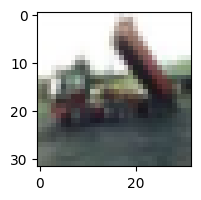

In [13]:
plt.figure(figsize = (2,2))
plt.imshow(x_train[2])

In [14]:
y_train[2]

array([9], dtype=uint8)

In [15]:
num_classes = 10
y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Multi - Layer Perceptron

In [23]:
mlp = models.Sequential()

In [24]:
mlp.add(layers.Flatten(input_shape = (32,32,3)))
mlp.add(layers.Dense(units = 200,activation = 'relu'))
mlp.add(layers.Dense(units = 80,activation = 'relu'))
mlp.add(layers.Dense(units = 10,activation = 'softmax'))

In [25]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               614600    
                                                                 
 dense_7 (Dense)             (None, 80)                16080     
                                                                 
 dense_8 (Dense)             (None, 10)                810       
                                                                 
Total params: 631490 (2.41 MB)
Trainable params: 631490 (2.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
mlp.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
mlp.fit(x_train,y_train,epochs = 10,batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 1.8806 - accuracy: 0.3226 - val_loss: 1.7771 - val_accuracy: 0.3670
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 1.7054 - accuracy: 0.3916 - val_loss: 1.6437 - val_accuracy: 0.4123
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 1.6317 - accuracy: 0.4134 - val_loss: 1.5915 - val_accuracy: 0.4397
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.5712 - accuracy: 0.4363 - val_loss: 1.5515 - val_accuracy: 0.4462
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 1.5350 - accuracy: 0.4523 - val_loss: 1.5262 - val_accuracy: 0.4556
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 1.5046 - accuracy: 0.4611 - val_loss: 1.5910 - val_accuracy: 0.4247
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 1.4783 - accuracy: 0.4727 - val_loss: 1.5018 - val_accuracy: 0

In [31]:
input_layer = layers.Input(shape = (32,32,3))

In [32]:
x = layers.Flatten()(input_layer)
x = layers.Dense(units = 200,activation = 'relu')(x)
x = layers.Dense(units = 100,activation = 'relu')(x)

In [33]:
output_layer  = layers.Dense(units = 10,activation = 'softmax')(x)

In [34]:
mlp_2 = models.Model(input_layer,output_layer)

In [35]:
mlp_2.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
mlp_2.fit(x_train,y_train,epochs = 10,batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 1.8718 - accuracy: 0.3213 - val_loss: 1.7068 - val_accuracy: 0.3940
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.6893 - accuracy: 0.3932 - val_loss: 1.6335 - val_accuracy: 0.4165
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 1.6185 - accuracy: 0.4196 - val_loss: 1.6263 - val_accuracy: 0.4160
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 1.5718 - accuracy: 0.4362 - val_loss: 1.5766 - val_accuracy: 0.4419
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 1.5353 - accuracy: 0.4512 - val_loss: 1.5380 - val_accuracy: 0.4537
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 1.5098 - accuracy: 0.4606 - val_loss: 1.5158 - val_accuracy: 0.4609
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 1.4838 - accuracy: 0.4712 - val_loss: 1.5053 - val_accuracy: 0.

In [37]:
mlp_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               614600    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 635710 (2.43 MB)
Trainable params: 635710 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Convolutional Neural Network

In [82]:
input_layer_cnn = layers.Input(shape = (32,32,3))

In [83]:
x = layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu')(input_layer_cnn)
x = layers.MaxPool2D(pool_size = (2,2))(x)

In [84]:
x = layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = (2,2))(x)

In [85]:
x = layers.Flatten()(x)

In [86]:
x = layers.Dense(units = 200,activation = 'relu')(x)
x = layers.Dense(units = 50,activation = 'relu')(x)

In [87]:
output_layer_cnn = layers.Dense(units = 10,activation = 'sigmoid')(x)

In [88]:
cnn = models.Model(input_layer_cnn,output_layer_cnn)

In [89]:
cnn.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 1152)              0   

In [90]:
cnn.compile(optimizer = 'adam',metrics = 'accuracy',loss = 'categorical_crossentropy')

In [91]:
cnn.fit(x_train,y_train,epochs = 10,batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/10
782/782 [==============================] - 47s 58ms/step - loss: 1.5401 - accuracy: 0.4410 - val_loss: 1.2646 - val_accuracy: 0.5474
Epoch 2/10
782/782 [==============================] - 43s 55ms/step - loss: 1.1716 - accuracy: 0.5835 - val_loss: 1.0981 - val_accuracy: 0.6115
Epoch 3/10
782/782 [==============================] - 43s 55ms/step - loss: 1.0284 - accuracy: 0.6370 - val_loss: 1.0647 - val_accuracy: 0.6279
Epoch 4/10
782/782 [==============================] - 43s 55ms/step - loss: 0.9346 - accuracy: 0.6736 - val_loss: 1.0414 - val_accuracy: 0.6408
Epoch 5/10
782/782 [==============================] - 42s 54ms/step - loss: 0.8513 - accuracy: 0.7008 - val_loss: 0.9750 - val_accuracy: 0.6640
Epoch 6/10
782/782 [==============================] - 42s 53ms/step - loss: 0.7751 - accuracy: 0.7303 - val_loss: 0.9296 - val_accuracy: 0.6790
Epoch 7/10
782/782 [==============================] - 43s 55ms/step - loss: 0.7036 - accuracy: 0.7531 - val_loss: 0.9452 - val_accuracy: